In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

In [2]:
def split(x_train, folds):
  #Dividing index values of x_train into parts with integer value="folds"
    list_of_indices=np.array_split(range(len(x_train)),folds)
    return list_of_indices



def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    trainscores = []
    testscores  = []  
    indices=split(x_train,folds)  # Storing list of splitted indecis  
    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds  = []
        for i in range(folds):   #for each value of folds we have one part of x_train as cross_validatin and rest of the part as train_data
          test_indices=list(indices[i])
          train_indices=list(set(range(len(x_train))).difference(set(indices[i])))

          # selecting the data points based on the train_indices and test_indices
          X_train = x_train[train_indices]
          Y_train = y_train[train_indices]
          X_test  = x_train[test_indices]
          Y_test  = y_train[test_indices]

          classifier.n_neighbors = k
          classifier.fit(X_train,Y_train)
          Y_predicted = classifier.predict(X_test)
          testscores_folds.append(accuracy_score(Y_test, Y_predicted))

          Y_predicted = classifier.predict(X_train)
          trainscores_folds.append(accuracy_score(Y_train, Y_predicted))

        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


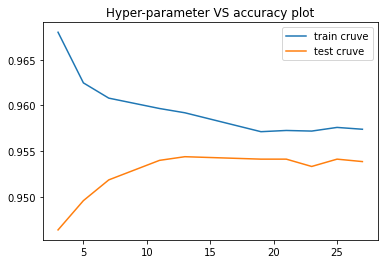

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params = sorted(random.sample(range(3,30,2), 10))   # Generating 10  odd unique values in range(3,27)
folds = 3

trainscores,testscores = RandomSearchCV(X_train, y_train, neigh, params, folds)
 

plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In above plot we can see at k=19 test and train curves are closest and accuracy is maximum so we are selecting hyperparamete value(k) = 19 

In [4]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

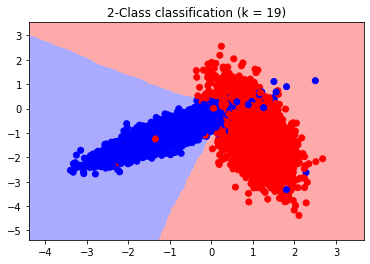

In [5]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 19)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)
